In [1]:
from transformers import FlaubertTokenizer, FlaubertModel
import torch
from scipy import spatial

"""
Il faut faire attention, la valeur de similarité est très élevé
(exemple: 0.80 pour dog et cat) pour certains mots qui ne devraient pas
"""

tokenizer = FlaubertTokenizer.from_pretrained('flaubert/flaubert_base_cased')
model = FlaubertModel.from_pretrained('flaubert/flaubert_base_cased')


Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
def similarite(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [130]:
def sim(sent1, sent2):
    inputs = tokenizer(sent1, return_tensors="pt")
    outputs = model(**inputs)

    inputs2 = tokenizer(sent2, return_tensors="pt")
    outputs2 = model(**inputs2)

    last_hidden_states = outputs.last_hidden_state
    last_hidden_states2 = outputs2.last_hidden_state
    """
    if last_hidden_states.detach().numpy().shape[1] != len(sent1.split(" ")) + 2:
        print("Erreur")
        print(len(sent1.split(" ")))
        print(len(sent2.split(" ")))
        print(last_hidden_states.detach().numpy().shape[1])
    """
    
    """
    if last_hidden_states.detach().numpy().shape != last_hidden_states2.detach().numpy().shape:
        print("ERROR: les sorties n'ont pas la même taille !")
        print(sent1)
        print(sent2)
    """
    
    scores = []
    for i in range(last_hidden_states.detach().numpy().shape[1]):
        scores.append(similarite(last_hidden_states.detach().numpy()[0][i], last_hidden_states2.detach().numpy()[0][i]))
    return scores

In [5]:
tokenizer = FlaubertTokenizer.from_pretrained('flaubert/flaubert_base_cased')
model = FlaubertModel.from_pretrained('flaubert/flaubert_base_cased')

inputs = tokenizer("Bonjour , mon chien est mignon", return_tensors="pt")
outputs = model(**inputs)

inputs2 = tokenizer("Bonjour , mon chat est mignon", return_tensors="pt")
outputs2 = model(**inputs2)

last_hidden_states = outputs.last_hidden_state
last_hidden_states2 = outputs2.last_hidden_state

Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [40]:
sim("salut je suis venu te dire que je pars", "salut je suis venu te dire que je fuis")

[0.8354153037071228,
 0.8688662052154541,
 0.905008852481842,
 0.9067577123641968,
 0.916238009929657,
 0.8888639211654663,
 0.8742471933364868,
 0.6570376753807068,
 0.4381970167160034,
 0.3882996439933777,
 0.38372427225112915]

In [138]:
ligne0 = """" La gestion moderne , qui utilise massivement le levier du militant , c' est-à-dire au fond qui mobilise l' art de l' """
ligne1 = "avocat"
ligne2 = """ plaidant une cause de justice , table sur le triomphe de la vérité convaincante " p 77 ."""

def get_index(ligne0, ligne1, ligne2):
    sent1 = ligne0 + ligne1 + ligne2
    val = len(ligne0.split(" "))

    dict = {}
    size = 0
    for index, token in enumerate(tokenizer.tokenize(sent1)):
        dict[index] = token
        size += 1
    
    for i in range(-1, size - len(sent1.split(" "))+1): #ça pourrait ne pas marcher si un mot "proche" du mot commence par les mêmes lettres
        if dict[val + i][:len(ligne1)] == ligne1: #ça pourrait ne pas marcher si le mot cible est coupé en deux
            return val + i
    print("Il y a une erreur. Le mot '" + ligne1 + "' n'a pas été trouvé.")
    print(dict)
    return None

In [139]:
nbr = 0
sims = []
sims_ident = []
with open("lexsub.txt", "r", encoding="utf8") as file:
    for ligne in file:
        print(nbr)
        ligne = ligne[:-1].split("\t")
        synonyms = []
        for m in ligne[3].split(";"):
            if len(m.split(" ")) == 1:
                synonyms.append(m)
                
        sent1 = ligne[0] + ligne[1] + ligne[2]
        #val = len(ligne[0].split(" ")) #Il faut trouver la valeur de val en utilisant le tokenizer
        val = get_index(ligne[0], ligne[1], ligne[2]) #un des problème est que le mot de l'autre phrase peut être coupé en deux
        if val != None:
            for m in synonyms:
                sent2 = ligne[0] + m + ligne[2]     #conséquence: 1) embedding d'un demi mot, 2) taille de phrase différente
                scores = sim(sent1, sent2)
                sims.append(scores[val])
                for i in range(len(scores)):
                    if i != val:
                        sims_ident.append(scores[i])
        nbr += 1
        
        
#Il faut que je vérifie mon code s'il est bon avant de le relancer

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [141]:
import matplotlib.pyplot as plt

(array([ 2.,  2.,  4.,  6.,  9.,  9., 16., 23., 32., 34., 28., 29., 38.,
        26., 18.]),
 array([0.55252397, 0.58177577, 0.61102757, 0.64027938, 0.66953118,
        0.69878298, 0.72803478, 0.75728658, 0.78653839, 0.81579019,
        0.84504199, 0.87429379, 0.90354559, 0.9327974 , 0.9620492 ,
        0.991301  ]),
 <a list of 15 Patch objects>)

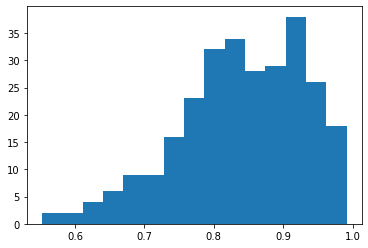

In [147]:
plt.hist(sims, bins=15)

(array([6.0000e+00, 2.1000e+01, 5.2000e+01, 9.1000e+01, 9.3000e+01,
        1.1300e+02, 1.2700e+02, 1.3100e+02, 1.0500e+02, 7.3000e+01,
        8.3000e+01, 9.3000e+01, 1.3200e+02, 3.0300e+02, 1.0087e+04]),
 array([0.00563038, 0.07192079, 0.13821119, 0.2045016 , 0.270792  ,
        0.33708241, 0.40337282, 0.46966322, 0.53595363, 0.60224403,
        0.66853444, 0.73482485, 0.80111525, 0.86740566, 0.93369606,
        0.99998647]),
 <a list of 15 Patch objects>)

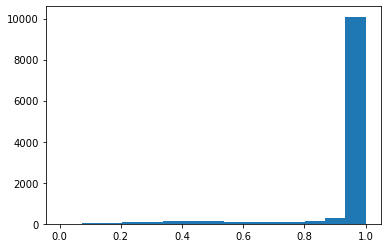

In [148]:
plt.hist(sims_ident, bins=15)